In [36]:
!pip3 install pandas

In [37]:
!pip3 install prophet

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from datetime import datetime


In [40]:
weather_df = pd.read_csv('london_weather.csv')
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [41]:
weather_df['ds'] = pd.to_datetime(weather_df['date'], format='%Y%m%d')
weather_df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,ds
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


In [42]:
df_cloud_cover = weather_df[["ds","cloud_cover"]]
df_cloud_cover = df_cloud_cover.rename(columns = {"cloud_cover":"y"})
df_cloud_cover

,ds,y
0,1979-01-01,2.0
1,1979-01-02,6.0
2,1979-01-03,5.0
3,1979-01-04,8.0
4,1979-01-05,6.0
...,...,...
15336,2020-12-27,1.0
15337,2020-12-28,7.0
15338,2020-12-29,7.0
15339,2020-12-30,6.0


In [43]:
model_cloud_cover = Prophet()

In [45]:
model_cloud_cover.fit(df_cloud_cover)

11:11:37 - cmdstanpy - INFO - Chain [1] start processing
11:11:39 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future_cloud_cover = model_cloud_cover.make_future_dataframe(periods=5, freq="Y")

In [47]:
forecast_cloud_cover = model_cloud_cover.predict(future_cloud_cover)

C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


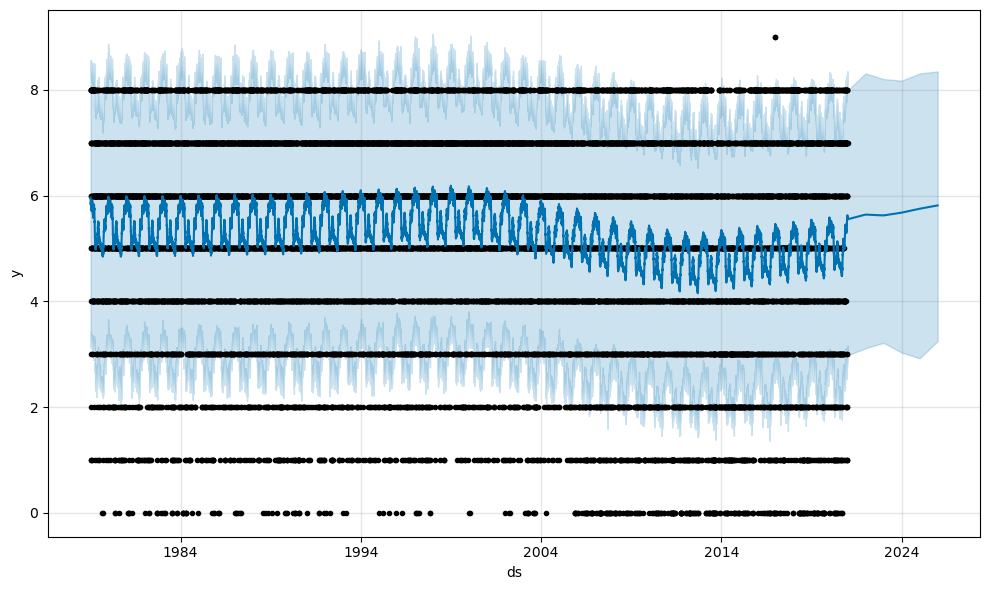

In [48]:
fig_cloud_cover = model_cloud_cover.plot(forecast_cloud_cover)

In [49]:
forecast_cloud_cover = forecast_cloud_cover.set_index("ds")
forecast_cloud_cover.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
1979-01-01,5.404365,3.451467,8.529589,5.404365,5.404365,0.561793,0.561793,0.561793,0.036870,0.036870,0.036870,0.524923,0.524923,0.524923,0.0,0.0,0.0,5.966158
1979-01-02,5.404377,3.297924,8.545063,5.404377,5.404377,0.526865,0.526865,0.526865,0.011002,0.011002,0.011002,0.515863,0.515863,0.515863,0.0,0.0,0.0,5.931242
1979-01-03,5.404389,3.434793,8.260914,5.404389,5.404389,0.537533,0.537533,0.537533,0.032689,0.032689,0.032689,0.504844,0.504844,0.504844,0.0,0.0,0.0,5.941923
1979-01-04,5.404401,3.274623,8.340053,5.404401,5.404401,0.461465,0.461465,0.461465,-0.030701,-0.030701,-0.030701,0.492166,0.492166,0.492166,0.0,0.0,0.0,5.865866
1979-01-05,5.404414,3.320318,8.442288,5.404414,5.404414,0.495609,0.495609,0.495609,0.017444,0.017444,0.017444,0.478166,0.478166,0.478166,0.0,0.0,0.0,5.900023


<Axes: xlabel='ds'>

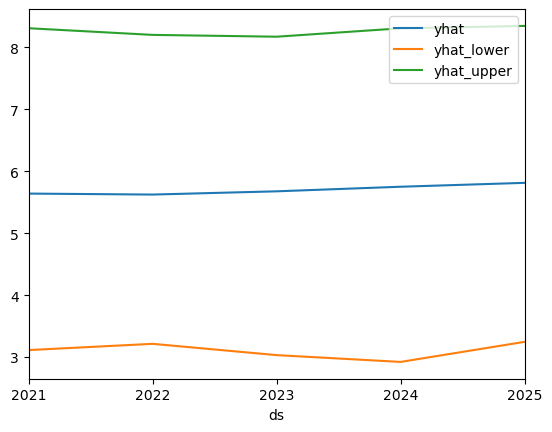

In [50]:
forecast_cloud_cover[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-5:,:].plot()

C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

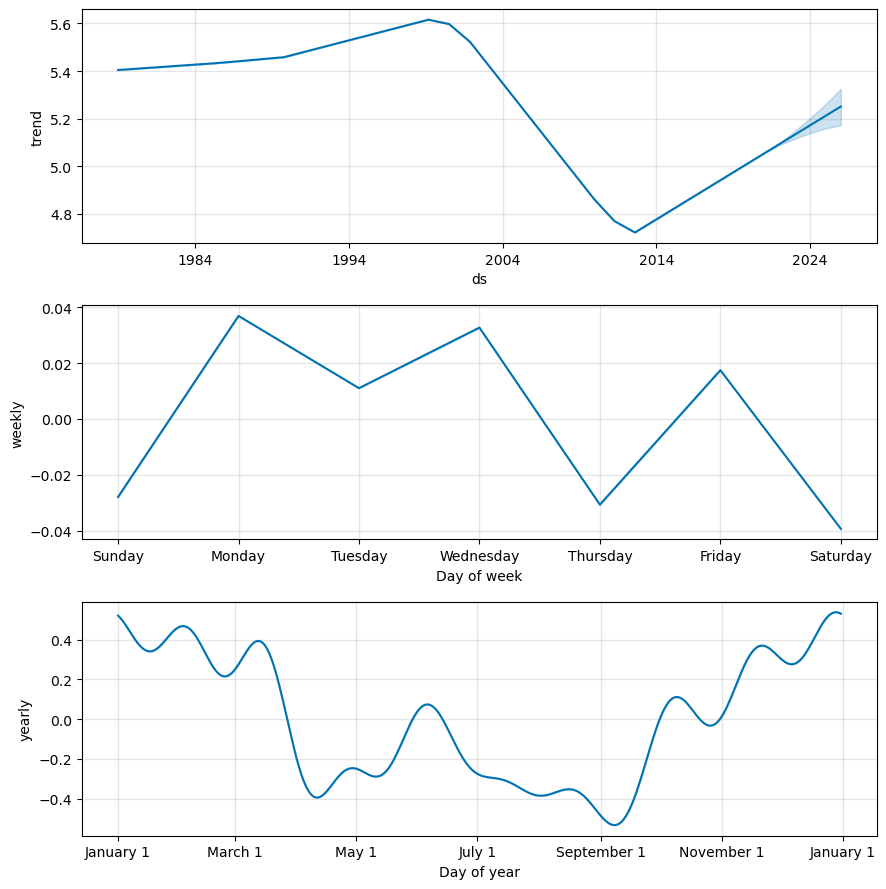

In [51]:
forecast_cloud_cover = forecast_cloud_cover.reset_index()
fig_cloud_cover_a = model_cloud_cover.plot_components(forecast_cloud_cover)

In [52]:
# Correct the renaming and conversion to datetime format
weather_df.rename(columns={'date': 'Date'}, inplace=True)  # Rename correctly first
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y%m%d')  # Convert after renaming


In [57]:
# Load the energy consumption data
energy_df = pd.read_csv('london_energy_consumption_upload.csv')

# drop grand total
energy_df = energy_df.drop(energy_df.index[-1])

# Convert date columns to datetime format for both dataframes
energy_df['Date'] = pd.to_datetime(energy_df['Row Labels'], format='%m/%d/%Y')


# Merge the dataframes on the 'Date' column
merged_df = pd.merge(weather_df, energy_df, on='Date', how='inner')

# Check the first few rows to ensure it merged correctly
print(merged_df.head())

# Ensure no NaN values in 'mean_temp' and 'KWH' columns that could skew the results
merged_df.dropna(subset=['mean_temp', 'Average of KWH'], inplace=True)

# Calculate the correlation between 'mean_temp' and 'KWH'
correlation_matrix = merged_df[['mean_temp', 'Average of KWH']].corr()
print("Correlation matrix:\n", correlation_matrix)

# Use matplotlib for a scatter plot
plt.scatter(merged_df['mean_temp'], merged_df['Average of KWH'])
plt.title('Mean Temperature vs. Energy Consumption')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Energy Consumption (KWH)')
plt.grid(True)  # Adds a grid to the plot for better readability
plt.show()

        Date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0 2011-11-23          7.0       2.0              35.0      13.5        6.8   
1 2011-11-24          3.0       2.0              35.0      12.5        8.6   
2 2011-11-25          3.0       5.0              52.0      14.0       11.0   
3 2011-11-26          4.0       0.7              24.0      13.9       10.2   
4 2011-11-27          3.0       5.9              55.0      13.2       11.8   

   min_temp  precipitation  pressure  snow_depth         ds  Row Labels  \
0       2.6            0.2  102720.0         0.0 2011-11-23  11/23/2011   
1       3.7            0.2  102710.0         0.0 2011-11-24  11/24/2011   
2       9.5            0.0  102450.0         0.0 2011-11-25  11/25/2011   
3       6.3            0.0  102580.0         0.0 2011-11-26  11/26/2011   
4       9.7            0.0  102130.0         0.0 2011-11-27  11/27/2011   

   Average of KWH  
0            6.95  
1            8.54  
2            9.50  


KeyError: ['KWH']

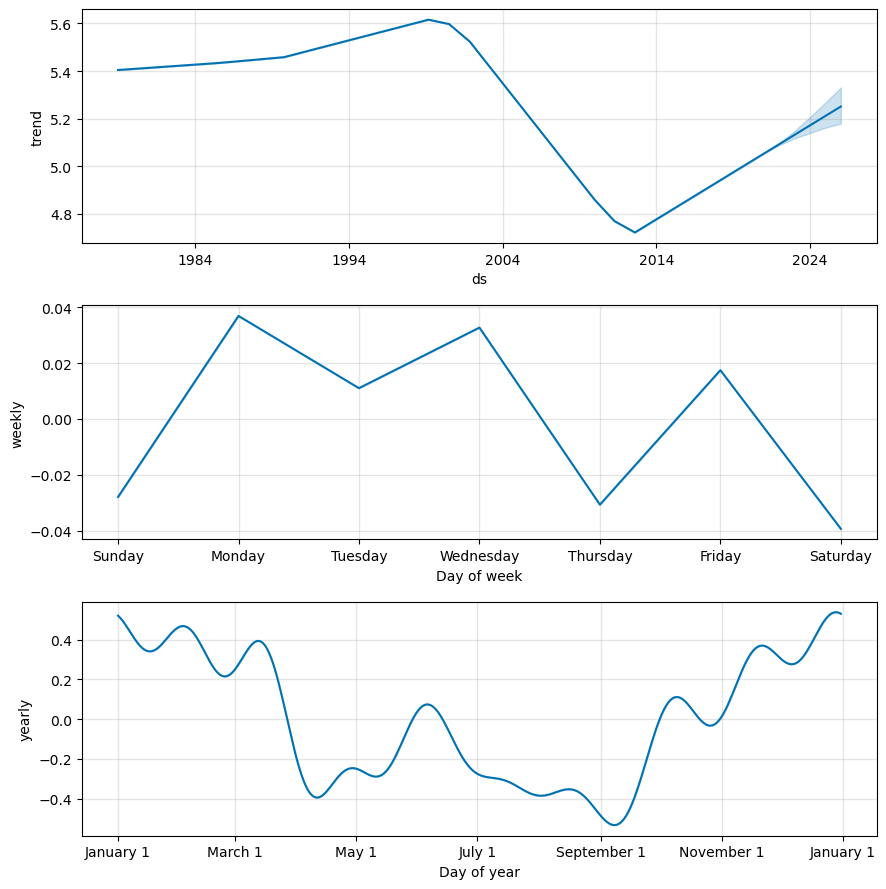

In [ ]:
forecast_cloud_cover = forecast_cloud_cover.reset_index()
fig_cloud_cover_a = model_cloud_cover.plot_components(forecast_cloud_cover)

In [ ]:
# Correct the renaming and conversion to datetime format
weather_df.rename(columns={'date': 'Date'}, inplace=True)  # Rename correctly first
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y-%m-%d')  # Convert after renaming


In [ ]:
# Load the energy consumption data
energy_df = pd.read_csv('london_energy_consumption_upload.csv')
# Convert date columns to datetime format for both dataframes
energy_df['Date'] = pd.to_datetime(energy_df['Date'], format='%Y-%m-%d')

# Merge the dataframes on the 'Date' column
merged_df = pd.merge(weather_df, energy_df, on='Date', how='inner')

# Check the first few rows to ensure it merged correctly
print(merged_df.head())

# Ensure no NaN values in 'Temperature' and 'KWH' columns that could skew the results
merged_df.dropna(subset=['Temperature', 'KWH'], inplace=True)

# Calculate the correlation between 'Temperature' and 'KWH'
correlation_matrix = merged_df[['Temperature', 'KWH']].corr()
print(correlation_matrix)

# Use Seaborn for a scatter plot
sns.scatterplot(data=merged_df, x='Temperature', y='KWH')
plt.title('Temperature vs. Energy Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (KWH)')
plt.show()